# Imports & Options

In [1]:
%load_ext autoreload
%autoreload 2

import crispr as cr 
from crispr.crispr_class import Crispr
import pertpy as pt
import pandas as pd
import numpy as np
from config import (files_data, col_cell_type_data, col_gene_symbols_data, 
                    assays_data, layer_perturbation_data,
                    col_perturbation_data, key_control_data, 
                    col_split_by_data, layer_perturbation_data,
                    col_target_genes_data,
                    key_treatment_data, col_guide_rna_data, col_batch_data,
                    col_sample_id_data, kws_process_guide_rna_data, 
                    col_num_umis_data)

# Options
pd.options.display.max_columns = 100
skip_preprocessing_clustering = False  # to skip these steps
print(dir(cr.ax))
file = "CRISPRi_scr"
# file = "CRISPRi_ess"
# file = "ECCITE"
# file = "augur_ex"
# file = "coda"
# file = "screen"
# file = "perturb-seq"
kws_pca = dict(n_comps=None, use_highly_variable=True)
kws_neighbors = None  # passed to neighbors function
kws_umap = dict(min_dist=0.3)  # passed to UMAP fx
kws_cluster = dict(resolution=0.5)  # passed to louvain/leiden fx

#  Set Arguments
if file in assays_data:
    if isinstance(assays_data[file], str) or assays_data[file] is None:
        assays_data[file] = [assays_data[file], None]
    assay, assay_protein = assays_data[file]
else:
    assay, assay_protein = None
file_path = files_data[file]
col_split_by = col_split_by_data[file]
kwargs_init = dict(assay=assay, assay_protein=assay_protein,
                   col_gene_symbols=col_gene_symbols_data[file],  
                   col_cell_type=col_cell_type_data[file], 
                   col_sample_id=col_sample_id_data[file], 
                   col_batch=col_batch_data[file],
                   col_perturbation=col_perturbation_data[file], 
                   col_guide_rna=col_guide_rna_data[file], 
                   col_num_umis=col_num_umis_data[file],
                   kws_process_guide_rna=kws_process_guide_rna_data[file],
                   remove_multi_transfected=True,
                   col_target_genes=col_target_genes_data[file], 
                   layer_perturbation=layer_perturbation_data[file],
                   key_control=key_control_data[file], 
                   key_treatment=key_treatment_data[file])
print(files_data)
if file == "default_fast":
    skip_preprocessing_clustering = True

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'analyze_composition', 'cluster', 'clustering', 'compute_distance', 'find_markers', 'perform_augur', 'perform_differential_prioritization', 'perform_gsea', 'perform_mixscape', 'perturbations']
{'CRISPRi_scr': {'directory': '/home/asline01/projects/crispr/examples/data/crispr-screening/HH03'}, 'CRISPRi_wgs': '/home/asline01/projects/crispr/examples/data/replogle_2022_k562_gwps.h5ad', 'CRISPRi_ess': '/home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad', 'pool': '/home/asline01/projects/crispr/examples/data/norman_2019_raw.h5ad', 'bulk': '/home/asline01/projects/crispr/examples/data/burczynski_crohn.h5ad', 'screen': '/home/asline01/projects/crispr/examples/data/dixit_2016_raw.h5ad', 'perturb-seq': '/home/asline01/projects/crispr/examples/data/adamson_2016_upr_perturb_seq.h5ad', 'ECCITE': '/home/asline01/projects/crispr/examples/data/papalexi_2021.h5a

# Setup Object

## Instantiate


This is more code than an end-user will actually need. `self = Crispr(file_path)` is the bare minimum needed (though you must specify some column and entry label names, such as the column name for the gene symbols, if they aren't the same as the defaults).

End users can simply pass to the `file` argument of `Crispr()` a 10x CellRanger output directory (or a dictionary of appropriate protospacer-related arguments if perturbation-related data aren't included in the .mtx file; see the `Crispr.preprocessing.combine_matrix_protospacer()` function for details) or .h5ad file if desired.

The extra code is just for generalizability across example datasets because in certain cases, we want to pass an AnnData Scanpy object because there are specific manipulations made to certain public datasets in the config.load_example_data function meant to decrease computation time/memory usage, etc.


In [3]:
print(f"Initialization arguments (from config):\n\n{kwargs_init}")
if isinstance(file, str) and file in ["ECCITE", "Adamson"]:
    self = Crispr(
        pt.data.papalexi_2021() if file == "ECCITE" else
        pt.data.adamson_2016_upr_perturb_seq(), **kwargs_init)
else:
    self = Crispr(file_path, **kwargs_init)
self.adata[self._assay].obs if self._assay else self.adata.obs

Initialization arguments (from config):

{'assay': None, 'assay_protein': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': None, 'col_batch': None, 'col_perturbation': 'perturbation', 'col_guide_rna': 'feature_call', 'col_num_umis': 'num_umis', 'kws_process_guide_rna': {'feature_split': '|', 'guide_split': '-', 'key_control_patterns': ['CTRL'], 'remove_multi_transfected': True}, 'remove_multi_transfected': True, 'col_target_genes': 'target_gene_name', 'layer_perturbation': nan, 'key_control': 'NT', 'key_treatment': 'KD'}


<<<INITIALIZING CRISPR CLASS OBJECT>>>


Unused keyword arguments: {}.



 AnnData object with n_obs × n_vars = 15078 × 36601
    obs: 'num_features', 'feature_call', 'num_umis'
    var: 'gene_ids', 'feature_types'


 AnnData object with n_obs × n_vars = 15078 × 36601
    obs: 'num_features', 'feature_call', 'num_umis'
    var: 'gene_ids', 'feature_types'


<<<PERFORMING gRNA PROCESSING AND FILTERING>>>


Un-used Keyword Arguments

num_features  \
AAACCCAAGATTTGCC-1           2.0   
AAACCCAAGCGATTCT-1           3.0   
AAACCCAAGTCTGCAT-1           6.0   
AAACCCACAGGATCTT-1           9.0   
AAACCCAGTCTCAAGT-1           1.0   
...                          ...   
TTTGTTGAGGTGCAGT-1           2.0   
TTTGTTGAGTACTCGT-1           4.0   
TTTGTTGGTTGCCGAC-1           4.0   
TTTGTTGTCACTGTTT-1           2.0   
TTTGTTGTCAGTGTGT-1           5.0   

                                                feature_call_original  \
AAACCCAAGATTTGCC-1                                    SNX17-1|SNX17-2   
AAACCCAAGCGATTCT-1                           SP110-1|HLA-B-1|SP140L-2   
AAACCCAAGTCTGCAT-1    RSBN1-1|PRDX6-1|STK11-1|RSBN1-2|PRDX6-2|NR4A1-2   
AAACCCACAGGATCTT-1  TAGAP-1|CRYZL1-1|MYD88-1|NR4A1-1|SPI1-1|IFNAR2...   
AAACCCAGTCTCAAGT-1                                             SPI1-2   
...                                                               ...   
TTTGTTGAGGTGCAGT-1                                    FASLG-1|FASLG-2   
TTTGTTGAGTACTCGT-1                POLR2E-1|IFNGR2-1|POLR2E-2|IFNGR2-2   
TTTGTTGGTTGCCGAC-1                    DUSP1-1|PPARA-1|TAGAP-2|DUSP1-2   
TTTGTTGTCACTGTTT-1                                   ATG16L1-1|GPX4-1   
TTTGTTGTCAGTGTGT-1       HLA-B-1|TMEM50B-1|DUSP1-1|DUSP1-2|RUNX3-P2-2   

                              num_umis_original feature_call  \
AAACCCAAGATTTGCC-1                       200|33        SNX17   
AAACCCAAGCGATTCT-1                      12|22|7          HLA   
AAACCCAAGTCTGCAT-1        194|381|51|513|119|47        RSBN1   
AAACCCACAGGATCTT-1  378|47|29|503|9|41|84|26|84        NR4A1   
AAACCCAGTCTCAAGT-1                           11         SPI1   
...                                         ...          ...   
TTTGTTGAGGTGCAGT-1                        58|41        FASLG   
TTTGTTGAGTACTCGT-1              681|216|146|143       POLR2E   
TTTGTTGGTTGCCGAC-1                   48|19|4|46        DUSP1   
TTTGTTGTCACTGTTT-1                       73|125         GPX4   
TTTGTTGTCAGTGTGT-1              188|168|35|9|47          HLA   

                                                 feature_call_flat_ix  \
AAACCCAAGATTTGCC-1                                          SNX17-1_2   
AAACCCAAGCGATTCT-1                           SP110-1|HLA-B-1|SP140L-2   
AAACCCAAGTCTGCAT-1                RSBN1-1_2|PRDX6-1_2|STK11-1|NR4A1-2   
AAACCCACAGGATCTT-1  TAGAP-1|CRYZL1-1_2|MYD88-1|NR4A1-1_2|SPI1-1|IF...   
AAACCCAGTCTCAAGT-1                                             SPI1-2   
...                                                               ...   
TTTGTTGAGGTGCAGT-1                                          FASLG-1_2   
TTTGTTGAGTACTCGT-1                              POLR2E-1_2|IFNGR2-1_2   
TTTGTTGGTTGCCGAC-1                          DUSP1-1_2|PPARA-1|TAGAP-2   
TTTGTTGTCACTGTTT-1                                   ATG16L1-1|GPX4-1   
TTTGTTGTCAGTGTGT-1             HLA-B-1|TMEM50B-1|DUSP1-1_2|RUNX3-P2-2   

                                                feature_call_list_all  \
AAACCCAAGATTTGCC-1                                     [SNX17, SNX17]   
AAACCCAAGCGATTCT-1                               [SP110, HLA, SP140L]   
AAACCCAAGTCTGCAT-1         [RSBN1, PRDX6, STK11, RSBN1, PRDX6, NR4A1]   
AAACCCACAGGATCTT-1  [TAGAP, CRYZL1, MYD88, NR4A1, SPI1, IFNAR2, IL...   
AAACCCAGTCTCAAGT-1                                             [SPI1]   
...                                                               ...   
TTTGTTGAGGTGCAGT-1                                     [FASLG, FASLG]   
TTTGTTGAGTACTCGT-1                   [POLR2E, IFNGR2, POLR2E, IFNGR2]   
TTTGTTGGTTGCCGAC-1                       [DUSP1, PPARA, TAGAP, DUSP1]   
TTTGTTGTCACTGTTT-1                                    [ATG16L1, GPX4]   
TTTGTTGTCAGTGTGT-1                [HLA, TMEM50B, DUSP1, DUSP1, RUNX3]   

                                                    num_umis_list_all  \
AAACCCAAGATTTGCC-1                                      [200.0, 33.0]   
AAACCCAAGCGATTCT-1                       

## Preprocess and Cluster

See `self.figures[run_label]["clustering"]` (object attribute) or method output for figures.

You must set use_highly_variable to False if you don't want to filter by HVGs
and if you did not set kws_hvg to None or False in `.preprocess()`


In that scenario, the 'highly_variable' column in  will be created in `.obsm` 
during `.preprocess()` and then used by default in `.cluster`.

UMAP Keywords: {'min_dist': 0.3}
AnnData object with n_obs × n_vars = 6733 × 36601
    obs: 'num_features', 'feature_call_original', 'num_umis_original', 'feature_call', 'feature_call_flat_ix', 'feature_call_list_all', 'num_umis_list_all', 'num_umis_total', 'feature_call_list_filtered', 'num_umis_list_filtered', 'feature_call_filtered', 'num_umis_filtered', 'num_umis', 'target_gene_name', 'perturbation'
    var: 'gene_ids', 'feature_types'

Un-used Keyword Arguments: {'col_sample_id': None, 'col_batch': None, 'col_perturbation': 'perturbation', 'col_guide_rna': 'feature_call', 'col_num_umis': 'num_umis', 'col_target_genes': 'target_gene_name', 'kws_umap': {'min_dist': 0.3}}
None None 20


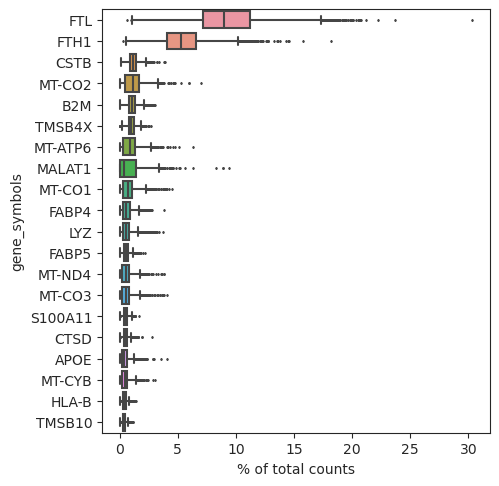


<<< FILTERING >>>

<<< DETECTING MITOCHONDRIAL GENES >>>

<<< PERFORMING QUALITY CONTROL >>>


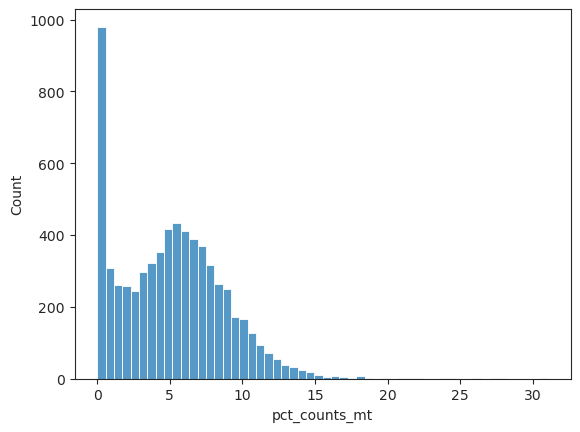

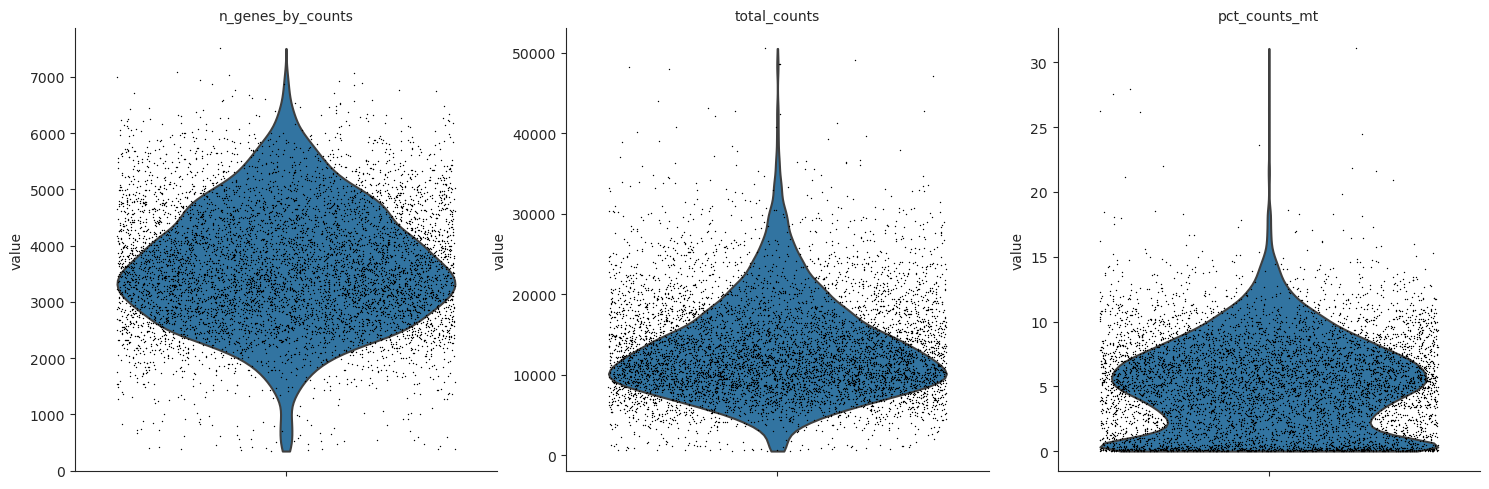

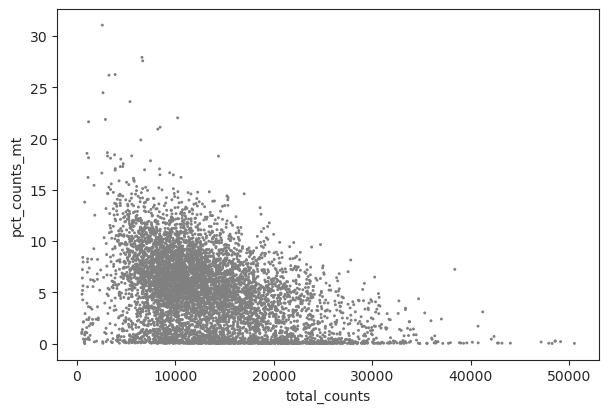

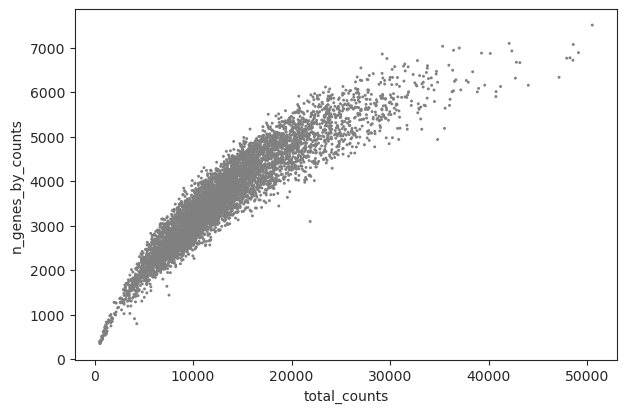


<<< NORMALIZING >>>

<<< DETECTING VARIABLE GENES >>>

<<< SCALING >>>



Un-used Keyword Arguments: {'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': None, 'col_batch': None, 'col_perturbation': 'perturbation', 'col_guide_rna': 'feature_call', 'col_num_umis': 'num_umis', 'col_target_genes': 'target_gene_name', 'key_control': 'NT', 'key_treatment': 'KD', 'key_nonperturbed': 'NP'}


<<< PERFORMING PCA >>>

 {'n_comps': None, 'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING: UMAP >>>

 {'min_dist': 0.3}


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


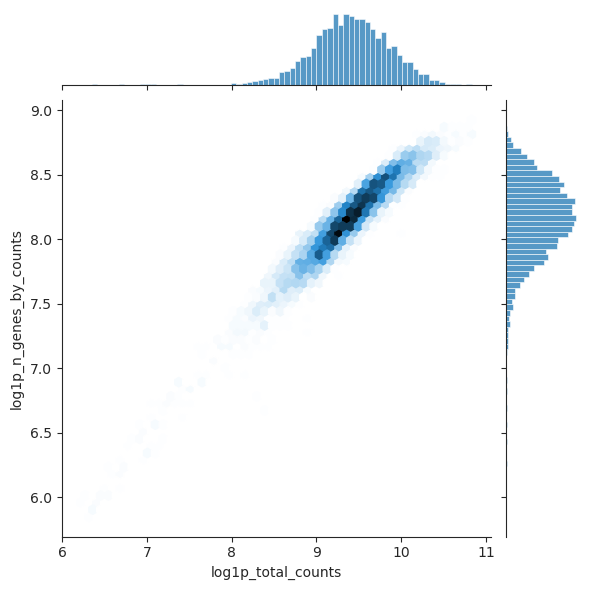

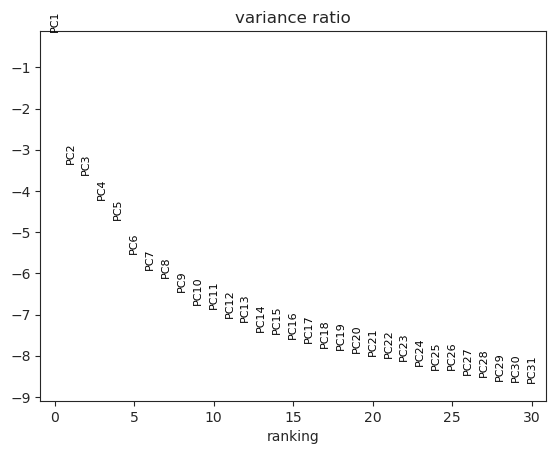

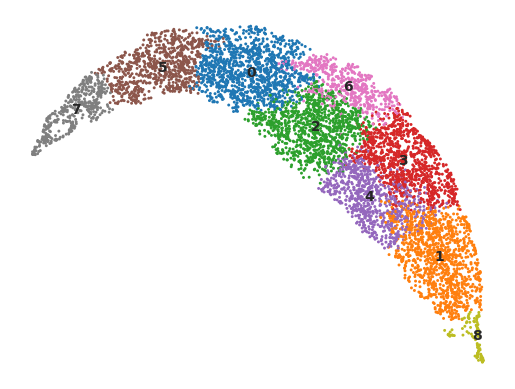

num_features  \
AAACCCAAGATTTGCC-1           2.0   
AAACCCAAGCGATTCT-1           3.0   
AAACCCAAGTCTGCAT-1           6.0   
AAACCCACAGGATCTT-1           9.0   
AAACCCAGTCTCAAGT-1           1.0   
...                          ...   
TTTGTTGAGGTGCAGT-1           2.0   
TTTGTTGAGTACTCGT-1           4.0   
TTTGTTGGTTGCCGAC-1           4.0   
TTTGTTGTCACTGTTT-1           2.0   
TTTGTTGTCAGTGTGT-1           5.0   

                                                feature_call_original  \
AAACCCAAGATTTGCC-1                                    SNX17-1|SNX17-2   
AAACCCAAGCGATTCT-1                           SP110-1|HLA-B-1|SP140L-2   
AAACCCAAGTCTGCAT-1    RSBN1-1|PRDX6-1|STK11-1|RSBN1-2|PRDX6-2|NR4A1-2   
AAACCCACAGGATCTT-1  TAGAP-1|CRYZL1-1|MYD88-1|NR4A1-1|SPI1-1|IFNAR2...   
AAACCCAGTCTCAAGT-1                                             SPI1-2   
...                                                               ...   
TTTGTTGAGGTGCAGT-1                                    FASLG-1|FASLG-2   
TTTGTTGAGTACTCGT-1                POLR2E-1|IFNGR2-1|POLR2E-2|IFNGR2-2   
TTTGTTGGTTGCCGAC-1                    DUSP1-1|PPARA-1|TAGAP-2|DUSP1-2   
TTTGTTGTCACTGTTT-1                                   ATG16L1-1|GPX4-1   
TTTGTTGTCAGTGTGT-1       HLA-B-1|TMEM50B-1|DUSP1-1|DUSP1-2|RUNX3-P2-2   

                              num_umis_original feature_call  \
AAACCCAAGATTTGCC-1                       200|33        SNX17   
AAACCCAAGCGATTCT-1                      12|22|7          HLA   
AAACCCAAGTCTGCAT-1        194|381|51|513|119|47        RSBN1   
AAACCCACAGGATCTT-1  378|47|29|503|9|41|84|26|84        NR4A1   
AAACCCAGTCTCAAGT-1                           11         SPI1   
...                                         ...          ...   
TTTGTTGAGGTGCAGT-1                        58|41        FASLG   
TTTGTTGAGTACTCGT-1              681|216|146|143       POLR2E   
TTTGTTGGTTGCCGAC-1                   48|19|4|46        DUSP1   
TTTGTTGTCACTGTTT-1                       73|125         GPX4   
TTTGTTGTCAGTGTGT-1              188|168|35|9|47          HLA   

                                                 feature_call_flat_ix  \
AAACCCAAGATTTGCC-1                                          SNX17-1_2   
AAACCCAAGCGATTCT-1                           SP110-1|HLA-B-1|SP140L-2   
AAACCCAAGTCTGCAT-1                RSBN1-1_2|PRDX6-1_2|STK11-1|NR4A1-2   
AAACCCACAGGATCTT-1  TAGAP-1|CRYZL1-1_2|MYD88-1|NR4A1-1_2|SPI1-1|IF...   
AAACCCAGTCTCAAGT-1                                             SPI1-2   
...                                                               ...   
TTTGTTGAGGTGCAGT-1                                          FASLG-1_2   
TTTGTTGAGTACTCGT-1                              POLR2E-1_2|IFNGR2-1_2   
TTTGTTGGTTGCCGAC-1                          DUSP1-1_2|PPARA-1|TAGAP-2   
TTTGTTGTCACTGTTT-1                                   ATG16L1-1|GPX4-1   
TTTGTTGTCAGTGTGT-1             HLA-B-1|TMEM50B-1|DUSP1-1_2|RUNX3-P2-2   

                                                feature_call_list_all  \
AAACCCAAGATTTGCC-1                                     [SNX17, SNX17]   
AAACCCAAGCGATTCT-1                               [SP110, HLA, SP140L]   
AAACCCAAGTCTGCAT-1         [RSBN1, PRDX6, STK11, RSBN1, PRDX6, NR4A1]   
AAACCCACAGGATCTT-1  [TAGAP, CRYZL1, MYD88, NR4A1, SPI1, IFNAR2, IL...   
AAACCCAGTCTCAAGT-1                                             [SPI1]   
...                                                               ...   
TTTGTTGAGGTGCAGT-1                                     [FASLG, FASLG]   
TTTGTTGAGTACTCGT-1                   [POLR2E, IFNGR2, POLR2E, IFNGR2]   
TTTGTTGGTTGCCGAC-1                       [DUSP1, PPARA, TAGAP, DUSP1]   
TTTGTTGTCACTGTTT-1                                    [ATG16L1, GPX4]   
TTTGTTGTCAGTGTGT-1                [HLA, TMEM50B, DUSP1, DUSP1, RUNX3]   

                                                    num_umis_list_all  \
AAACCCAAGATTTGCC-1                                      [200.0, 33.0]   
AAACCCAAGCGATTCT-1                       

In [4]:
if skip_preprocessing_clustering is False:  # if not already processed & clustered
    
    # Arguments
    print(f"UMAP Keywords: {kws_umap}")
    
    # Preprocess
    process_kws = dict(kws_hvg=dict(min_mean=0.0125, max_mean=3, min_disp=0.5),
                       target_sum=1e4, max_genes_by_counts=2500, max_pct_mt=15,
                       min_genes=200, min_cells=3, scale=10, regress_out=None)
    self.preprocess(**process_kws, kws_umap=kws_umap)  # preprocessing
    
    # Cluster 
    self.cluster(method_cluster="leiden", kws_neighbors=kws_neighbors,
                 kws_pca=kws_pca, kws_umap=kws_umap,  kws_cluster=kws_cluster)
    
self.adata.obs

## Find Cluster Markers (DEGs)

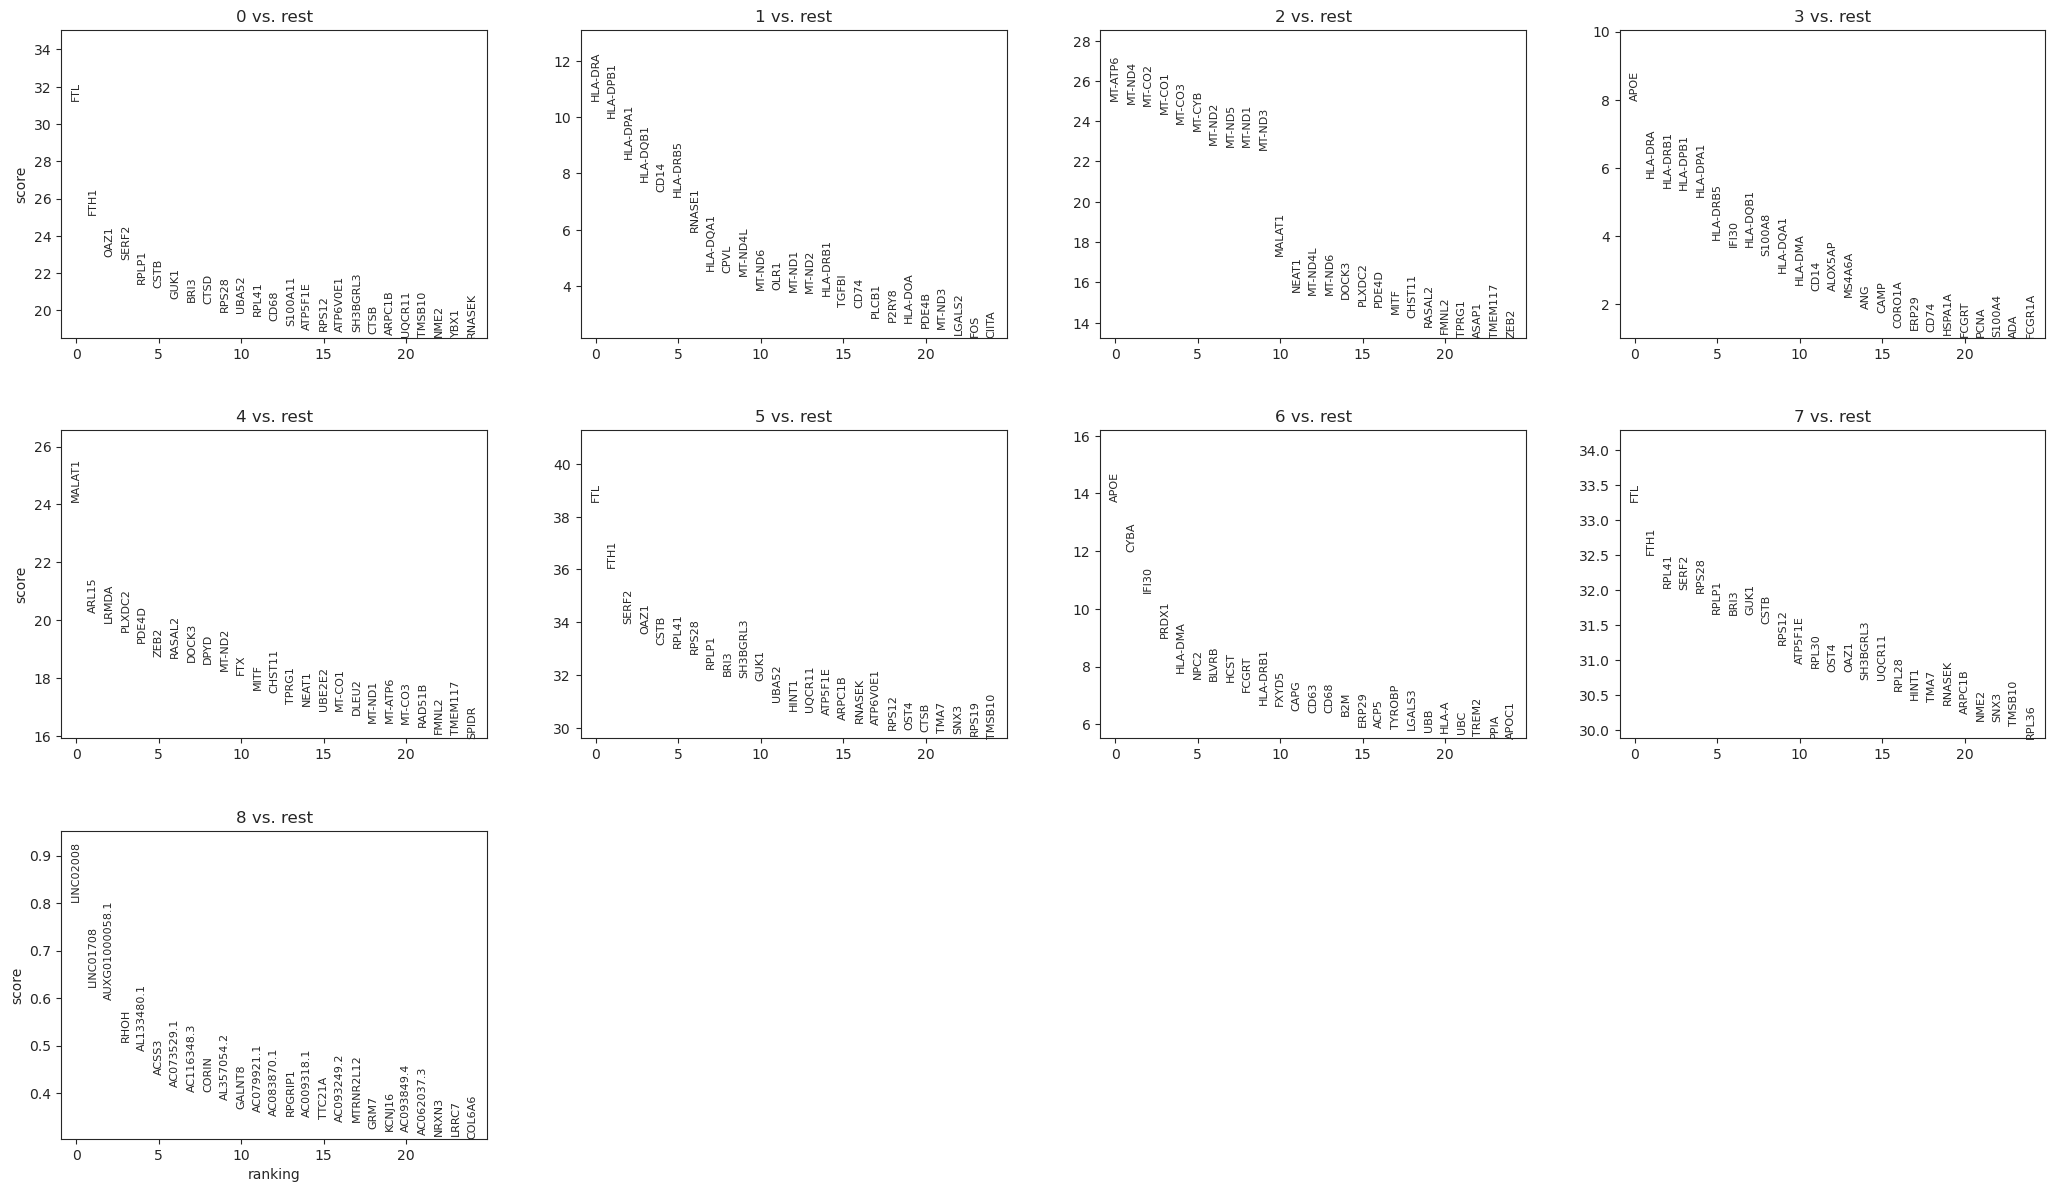

                  scores  logfoldchanges          pvals      pvals_adj
leiden names                                                          
0      FTL     31.232216             NaN  3.893431e-214  8.574892e-210
       FTH1    25.160320             inf  1.089610e-139  1.199879e-135
       OAZ1    22.877329       11.322585  7.814102e-116  5.736593e-112
       SERF2   22.725088       15.650467  2.531195e-114  1.393676e-110
       RPLP1   21.440582        9.388279  5.590880e-102   2.462671e-98
...                  ...             ...            ...            ...
8      BRI3   -17.566845      -36.268684   4.420866e-69   1.681593e-65
       TYROBP -17.577623      -47.757553   3.655761e-69   1.681593e-65
       TMSB4X -17.587805     -164.059311   3.054830e-69   1.681593e-65
       FTH1   -17.765842            -inf   1.299722e-70   1.431254e-66
       FTL    -17.807613            -inf   6.168356e-71   1.358519e-66

[198216 rows x 4 columns]
                  scores  logfoldchanges          

In [5]:
marks, figs_m = self.find_markers(n_genes=5, layer="scaled", 
                                  method="wilcoxon", key_reference="rest")
print(marks)
# marks.loc["6"].loc[marks.loc["6"].scores.abs().sort_values(ascending=False).iloc[:10].index]

## Inspect & Set Up Arguments for Later


This code looks more complicated than it actually would actually be for an end user because it was made to be generalizable across several datasets with particular column names, sizes that make it necessary to subset them in order to run the vignettes in a reasonable period of time, etc.

Basically, you won't need this code as an end user; this is just to choose relevant random subsets of genes, perturbations, etc. that are available in a given example dataset, for illustration purposes (and to conserve memory/time by not using every gene/condition/etc.). 

In real use cases, you will know what genes and conditions are of interest, and you can manually specify them by simply stating them in the appropriate arguments (such as `target_gene_idents`) or (in many cases) by not specifying the argument (resulting in the code using all available genes, etc.).

In [6]:
# Choose Subset of Sequenced Genes
genes = np.array((self.adata[assay] if assay else self.adata.var.reset_index(
    ))[self._columns["col_gene_symbols"]])
if file == "CRISPRi_scr":
    genes_subset = ["CDKN2A", "CDKN1A", "PLAUR", "TP53", "IL6ST", "IL1A", 
                    "CXCL8", "CCL2", "CEBPB", "NFKB1", "IGFBP7", "TGFB1", 
                    "BCL2", "PTGER4", "ERCC1", "ERCC4", "ATG16L1", "NOD2", "LACC1"]
else:
    genes_subset = list(pd.Series(genes).sample(10))

# Perturbation Categories
(self.adata[assay] if assay else self.adata).obs[
    self._columns["col_perturbation"]].unique()

['KD', 'NT']
Categories (2, object): ['KD', 'NT']

## Basic Plots


<<< PLOTTING PRE-PROCESSING >>>

<<< PLOTTING GEX (Heatmap) >>>

<<< PLOTTING GEX (Violin) >>>


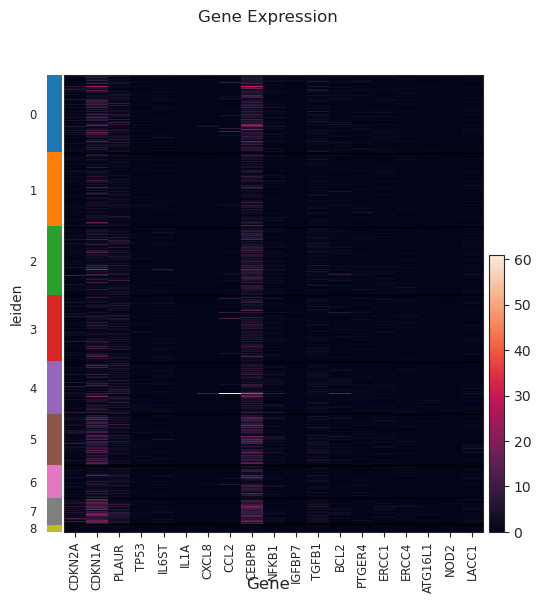

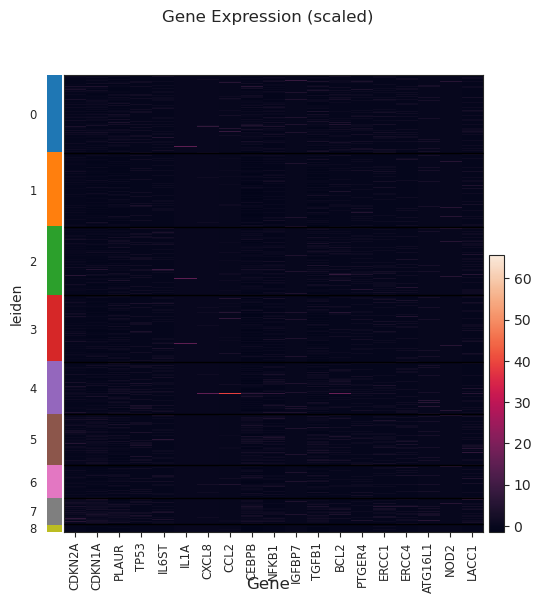

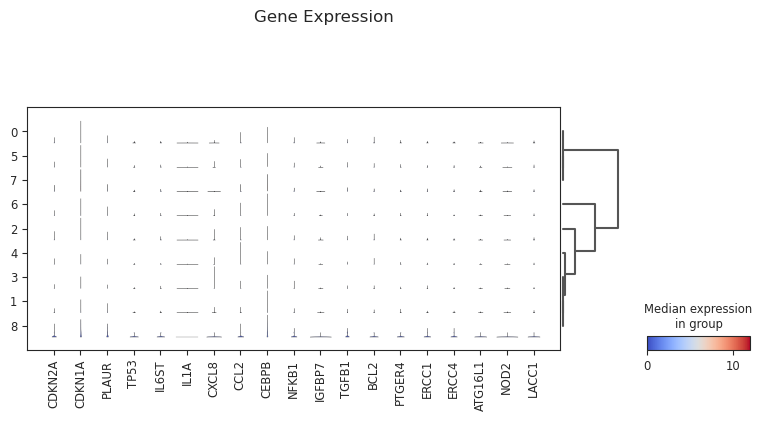

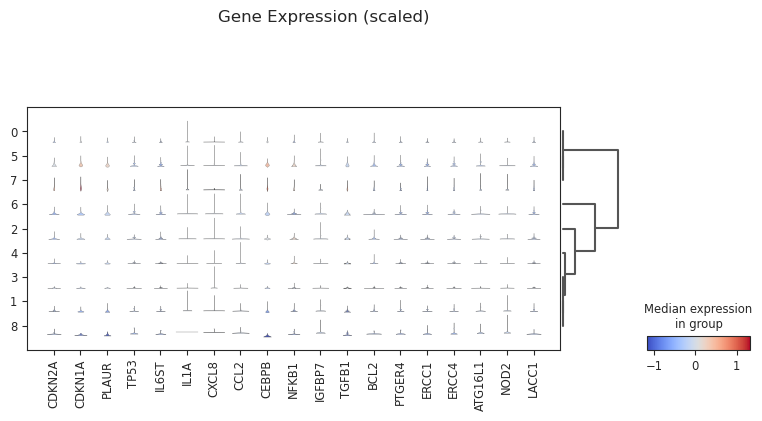


<<< PLOTTING GEX (Matrix) >>>
{'cmap': 'coolwarm', 'dendrogram': True, 'swap_axes': False}


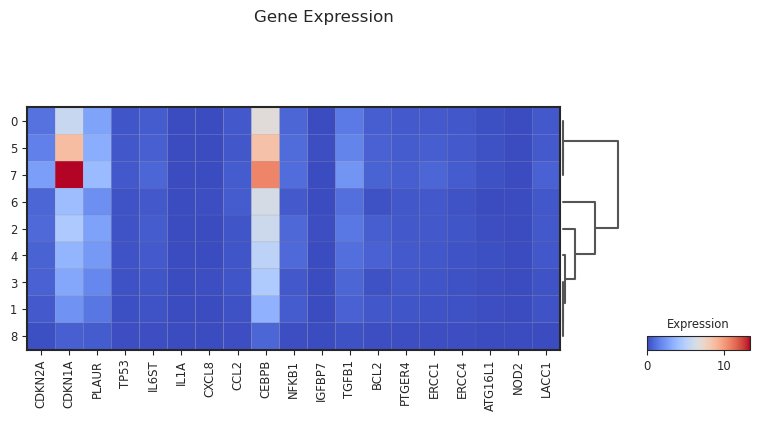

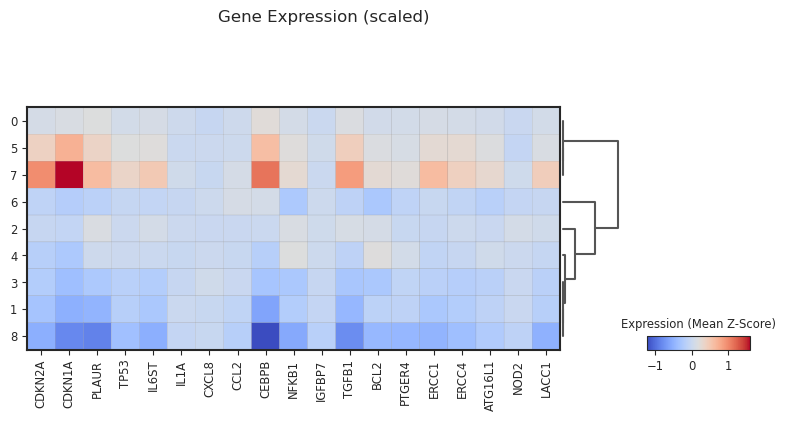


<<< PLOTTING UMAP >>>

<<< PLOTTING GEX ON UMAP >>>


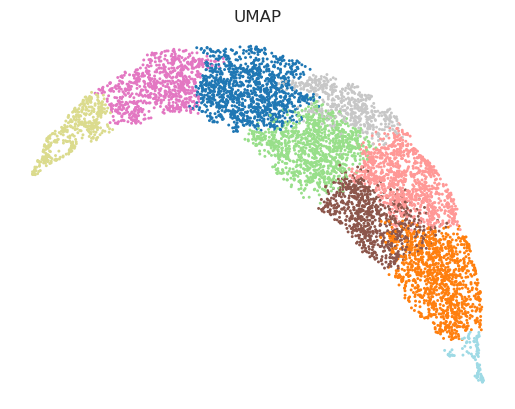

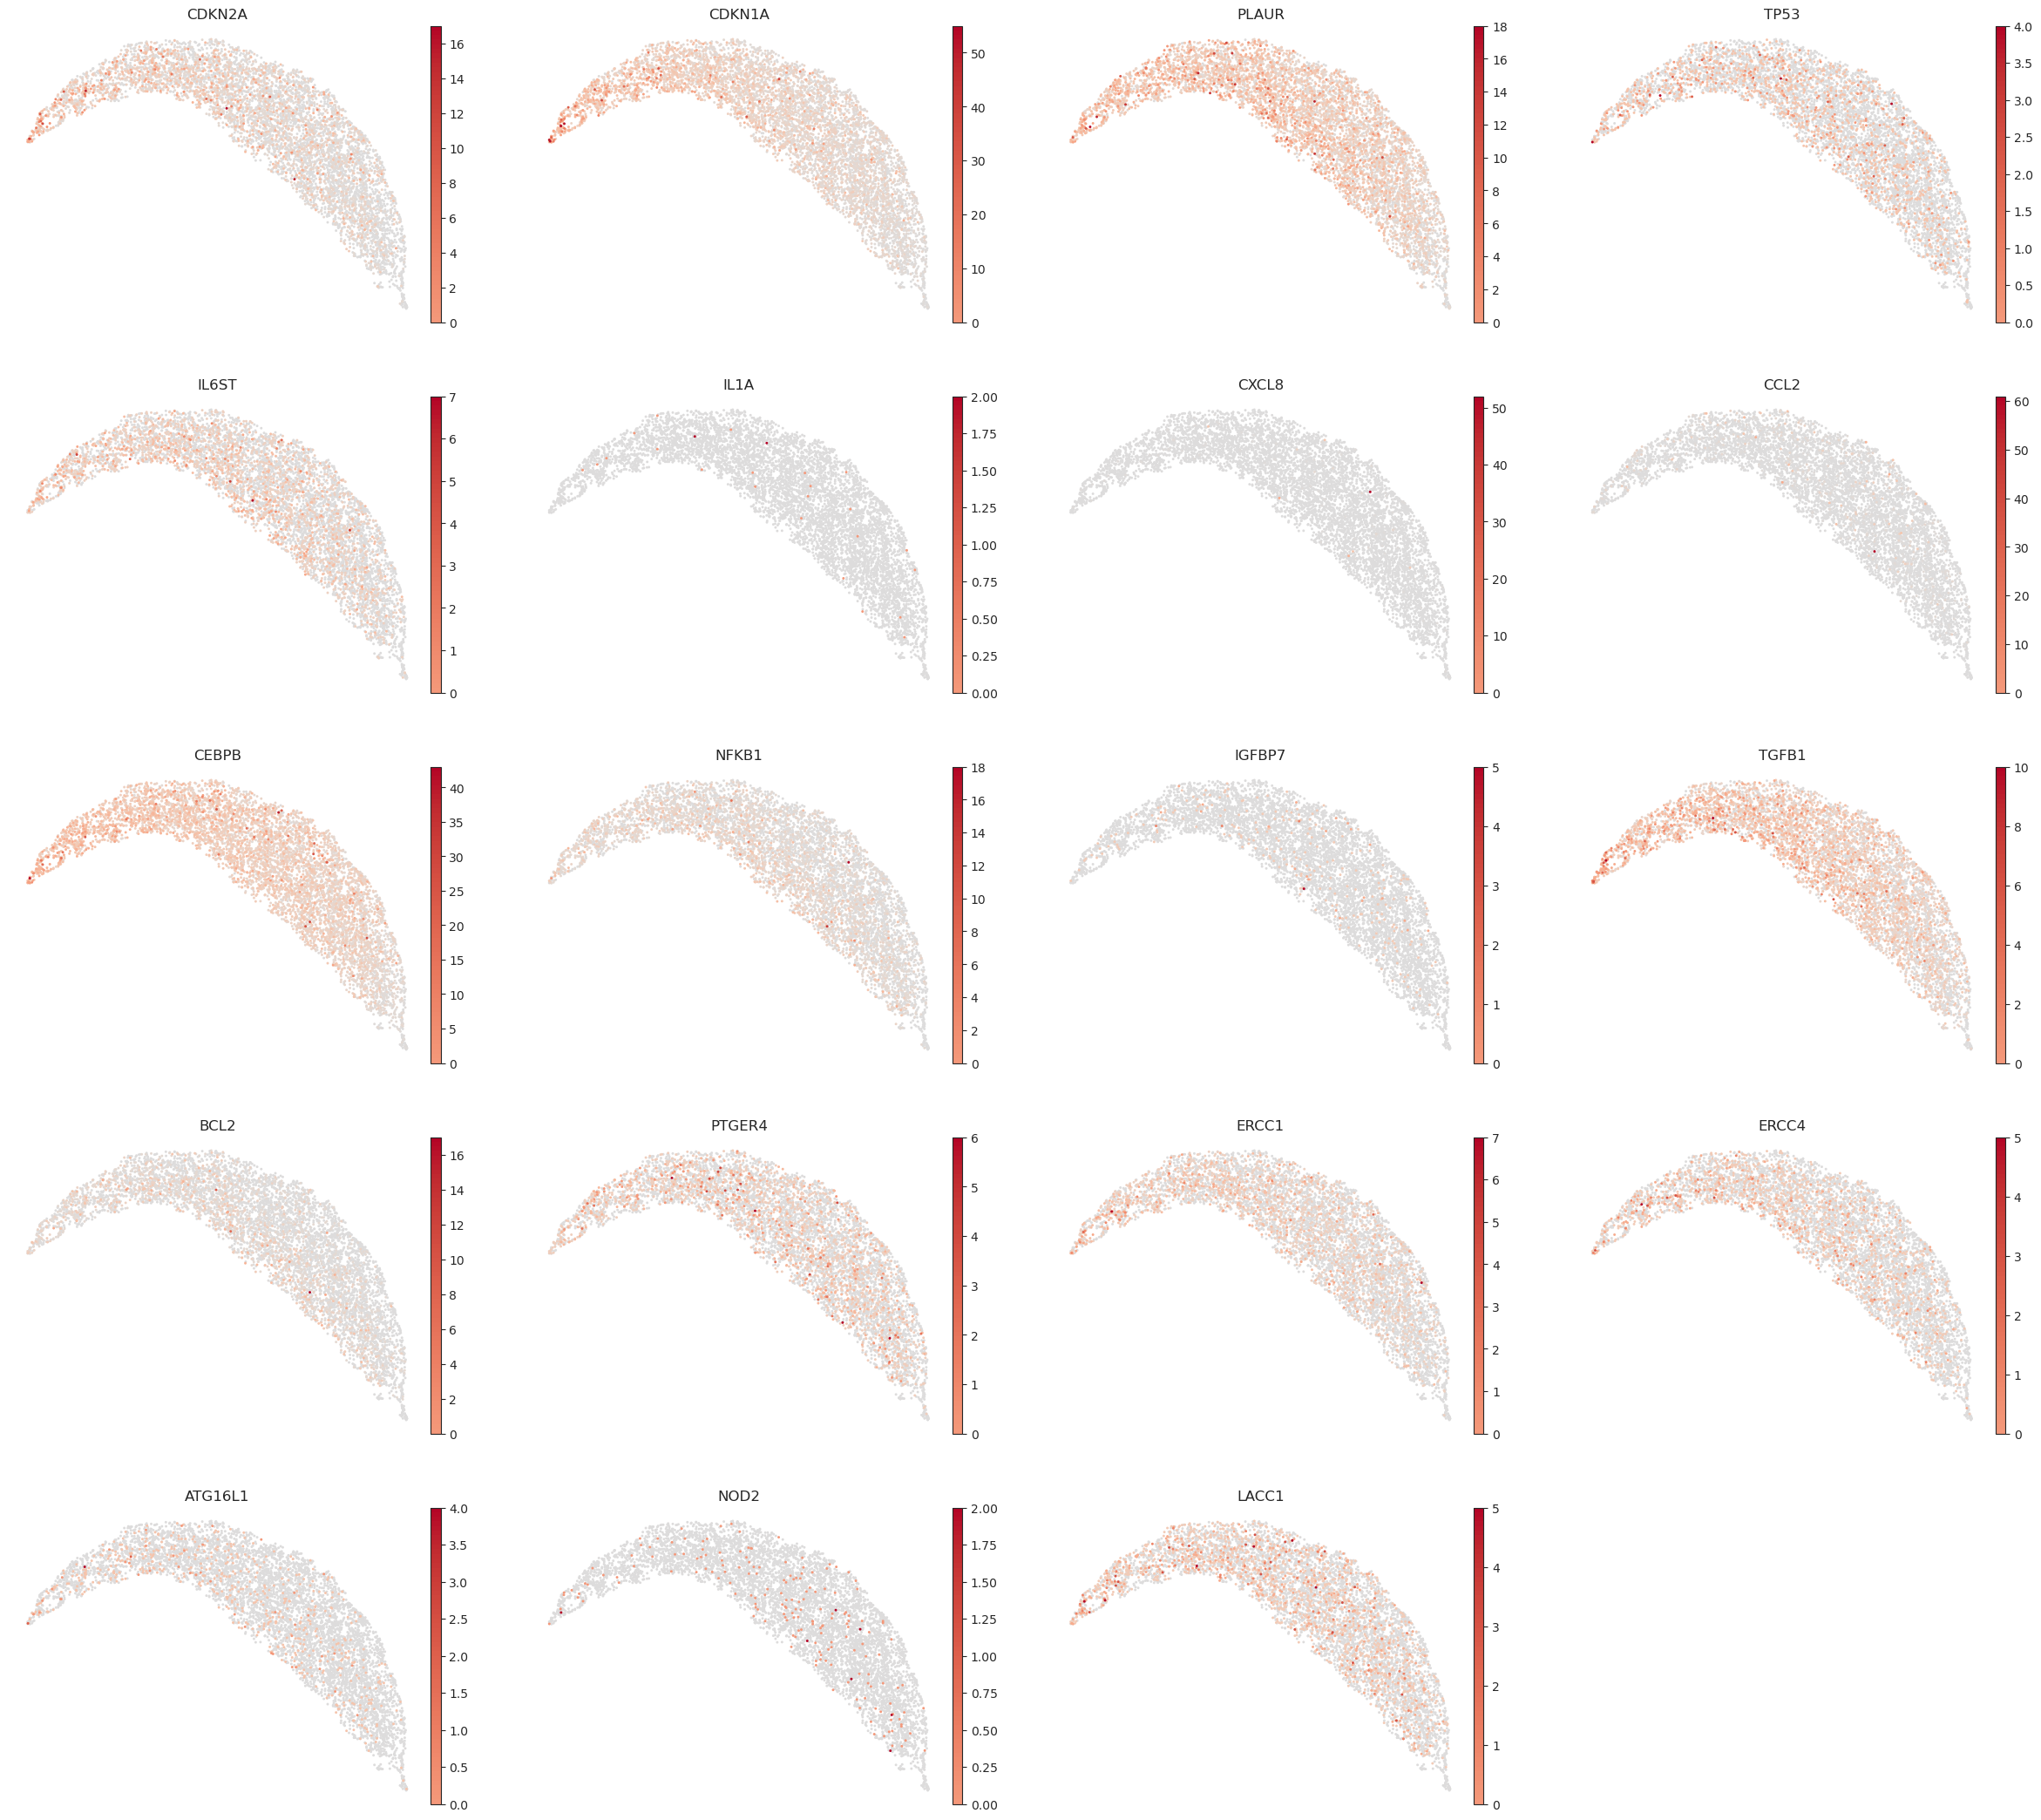

In [7]:
figs = self.plot(genes=genes_subset, layers="all", 
                 kws_gex_violin=dict(scale="area", height=10))

# Perturbation Analyses

## Augur: Cell Type-Level Perturbation Response

Which cell types are most affected by perturbations? Quantify perturbation responses by cell type with Augur, which uses supervised machine learning classification of experimental condition labels (e.g., treated versus untreated). The more separable the condition among cells of a given type, the higher the perturbation effect score.

<u> __Features__ </u>  

- Quantify and visualize degree of perturbation response by cell type

<u> __Input__ </u>  

<u> __Output__ </u>  

mean_augur_score

<u> __Notes__ </u>  

- Sub-sample sizes equal across conditions; does not account for perturbation-induced compositional shifts (cell type abundance)
- Scores are for cell types (aggregated across cells, not individual cells)
- Two modes
    - If select_variance_feature=True, run the original Augur implementation, which removes genes that don't vary much across cell type.
    - If False, use features selected by `scanpy.pp.highly_variable_genes()`, which is faster and sensitively recovers effects; however, the feature selection may yield inflated Augur scores because this reduced feature set is used in training, resulting in it taking advantage of the pre-existing power of this feature selection to separate cell types.
    - If False, you also have to be sure that "highly_variable_features" is a variable in your data. This can be complicated if you have a separate layer for perturbation data.


Un-used Keyword Arguments: {'col_sample_id': None, 'col_batch': None, 'col_guide_rna': 'feature_call', 'col_num_umis': 'num_umis', 'col_target_genes': 'target_gene_name', 'layer': nan, 'kws_umap': {'min_dist': 0.3}}
AnnData object with n_obs × n_vars = 6733 × 22024
    obs: 'num_features', 'feature_call_original', 'num_umis_original', 'feature_call', 'feature_call_flat_ix', 'feature_call_list_all', 'num_umis_list_all', 'num_umis_total', 'feature_call_list_filtered', 'num_umis_list_filtered', 'feature_call_filtered', 'num_umis_filtered', 'num_umis', 'target_gene_name', 'perturbation', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'leiden', 'label', 'cell_type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors', 'umap', 'leiden'

Filtering samples with NT and KD labels.

Set smaller span value in the case of a `segmentation fault` error.

Set larger span in case of svddc or other near singularities error.

Output()

AAACGAACAACTCCAA-1-0    2
AAAGAACCATTGCAAC-1-0    0
AAAGGGCAGGATCACG-1-0    2
AAAGTCCAGTACTGGG-1-0    3
AAAGTCCTCGAGAGAC-1-0    4
                       ..
TTTGTTGAGGTGCAGT-1-1    2
TTTGTTGAGTACTCGT-1-1    1
TTTGTTGGTTGCCGAC-1-1    4
TTTGTTGTCACTGTTT-1-1    2
TTTGTTGTCAGTGTGT-1-1    2
Name: cell_type, Length: 6733, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

AAACGAACAACTCCAA-1-0    2
AAAGAACCATTGCAAC-1-0    0
AAAGGGCAGGATCACG-1-0    2
AAAGTCCAGTACTGGG-1-0    3
AAAGTCCTCGAGAGAC-1-0    4
                       ..
TTTGTTGAGGTGCAGT-1-1    2
TTTGTTGAGTACTCGT-1-1    1
TTTGTTGGTTGCCGAC-1-1    4
TTTGTTGTCACTGTTT-1-1    2
TTTGTTGTCAGTGTGT-1-1    2
Name: cell_type, Length: 6733, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

AAACGAACAACTCCAA-1-0    2
AAAGAACCATTGCAAC-1-0    0
AAAGGGCAGGATCACG-1-0    2
AAAGTCCAGTACTGGG-1-0    3
AAAGTCCTCGAGAGAC-1-0    4
                       ..
TTTGTTGAGGTGCAGT-1-1    2
TTTGTTGAGTACTCGT-1-1    1
TTTGTTGGTTGCCGAC-1-1    4
TTTGTTGTCACTGTTT-1-1    2
TTTGTTGTCAGTGTGT-1-1    2
Name: cell_type, Length: 6733, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

AAACGAACAACTCCAA-1-0    2
AAAGAACCATTGCAAC-1-0    0
AAAGGGCAGGATCACG-1-0    2
AAAGTCCAGTACTGGG-1-0    3
AAAGTCCTCGAGAGAC-1-0    4
                       ..
TTTGTTGAGGTGCAGT-1-1    2
TTTGTTGAGTACTCGT-1-1    1
TTTGTTGGTTGCCGAC-1-1    4
TTTGTTGTCACTGTTT-1-1    2
TTTGTTGTCAGTGTGT-1-1    2
Name: cell_type, Length: 6733, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

AAACGAACAACTCCAA-1-0    2
AAAGAACCATTGCAAC-1-0    0
AAAGGGCAGGATCACG-1-0    2
AAAGTCCAGTACTGGG-1-0    3
AAAGTCCTCGAGAGAC-1-0    4
                       ..
TTTGTTGAGGTGCAGT-1-1    2
TTTGTTGAGTACTCGT-1-1    1
TTTGTTGGTTGCCGAC-1-1    4
TTTGTTGTCACTGTTT-1-1    2
TTTGTTGTCAGTGTGT-1-1    2
Name: cell_type, Length: 6733, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

AAACGAACAACTCCAA-1-0    2
AAAGAACCATTGCAAC-1-0    0
AAAGGGCAGGATCACG-1-0    2
AAAGTCCAGTACTGGG-1-0    3
AAAGTCCTCGAGAGAC-1-0    4
                       ..
TTTGTTGAGGTGCAGT-1-1    2
TTTGTTGAGTACTCGT-1-1    1
TTTGTTGGTTGCCGAC-1-1    4
TTTGTTGTCACTGTTT-1-1    2
TTTGTTGTCAGTGTGT-1-1    2
Name: cell_type, Length: 6733, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

AAACGAACAACTCCAA-1-0    2
AAAGAACCATTGCAAC-1-0    0
AAAGGGCAGGATCACG-1-0    2
AAAGTCCAGTACTGGG-1-0    3
AAAGTCCTCGAGAGAC-1-0    4
                       ..
TTTGTTGAGGTGCAGT-1-1    2
TTTGTTGAGTACTCGT-1-1    1
TTTGTTGGTTGCCGAC-1-1    4
TTTGTTGTCACTGTTT-1-1    2
TTTGTTGTCAGTGTGT-1-1    2
Name: cell_type, Length: 6733, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

Skipping 7 cell type - the number of samples for at least one class type is less than subsample size 20.

Skipping 8 cell type - the number of samples for at least one class type is less than subsample size 20.

                         2         0         3         4         1         5  \
mean_augur_score  0.484490  0.498753  0.501349  0.525454  0.494717  0.528583   
mean_auc          0.484490  0.498753  0.501349  0.525454  0.494717  0.528583   
mean_accuracy     0.483993  0.497363  0.504396  0.499267  0.487399  0.512601   
mean_precision    0.484222  0.502722  0.514021  0.489968  0.483821  0.516264   
mean_f1           0.446573  0.434024  0.486833  0.443469  0.419196  0.480811   
mean_recall       0.467937  0.427619  0.513492  0.454444  0.420635  0.505079   

                         6  
mean_augur_score  0.482018  
mean_auc          0.482018  
mean_accuracy     0.486190  
mean_precision    0.489579  
mean_f1           0.445696  
mean_recall       0.456190  


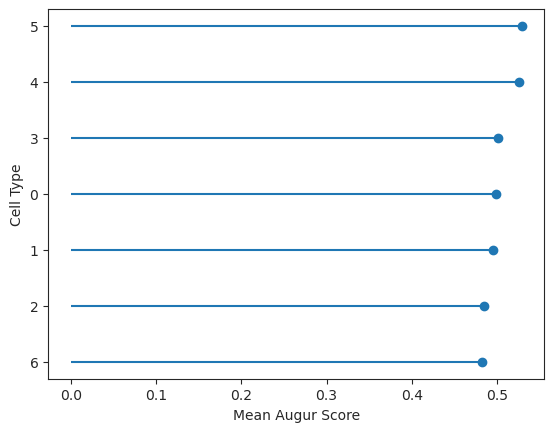

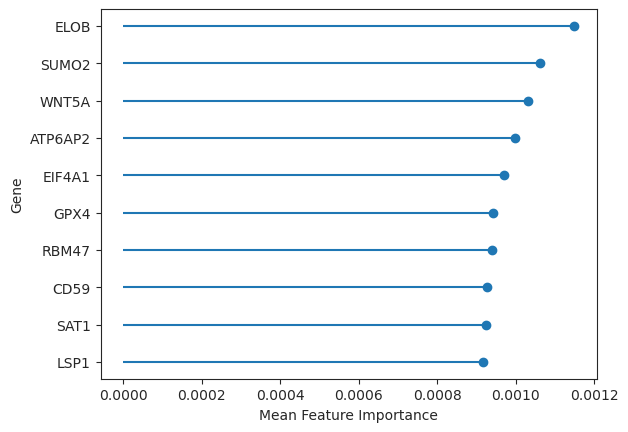

In [8]:
augur_data, augur_results, figs_augur = self.run_augur(
    col_perturbation=self._columns["col_perturbation"], 
    key_treatment=self._keys["key_treatment"], 
    classifier="random_forest_classifier", n_threads=True,
    augur_mode="default", select_variance_features=True, 
    n_folds=2,  # in real life, you'll want this to be >= 3, usually 3-10
    kws_umap=kws_umap, subsample_size=20, kws_augur_predict=dict(span=0.7))

## Mixscape: Cell-Level Perturbation Response

**Which cell types are most affected by perturbations?** Quantify perturbation responses by cell type with Augur, which uses supervised machine learning classification of condition labels (e.g., treated versus untreated) and looking at how easy it is to tell perturbed versus non-perturbed (more separable = higher effect).

**Are there perturbation-specific clusters?** Mixscape uses linear discriminant analysis (LDA) to cluster cells that resemble each other in terms of gene expression and perturbation condition. _(LDA reduces dimensionality and attempts to maximize the separability of classes. Unperturbed cells are removed from analysis.)_

<u> __Features__ </u>  

- Remove confounds (e.g., cell cycle, batch effects)
- Classify cells as affected or unaffected (i.e., "escapees") by the perturbation
- Quantify and visualize degree of perturbation response

<u> __Input__ </u>  

<u> __Output__ </u>  
- Mixscape figures

<u> __Notes__ </u>  



Un-used Keyword Arguments: {'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': None, 'col_batch': None, 'col_num_umis': 'num_umis', 'key_nonperturbed': 'NP'}


Target gene RPN1 not in mixscape_class!


Target gene GPX4 not in mixscape_class!


Target gene SPHK2 not in mixscape_class!


Target gene RASGRP1 not in mixscape_class!


Target gene TMEM50B not in mixscape_class!


Target gene PPM1G not in mixscape_class!


Target gene NRBP1 not in mixscape_class!


Target gene NOD2 not in mixscape_class!


Target gene INPP5D not in mixscape_class!


Target gene PDPN not in mixscape_class!


Target gene PTPN22 not in mixscape_class!


Target gene PPARA not in mixscape_class!


Target gene CRYZL1 not in mixscape_class!


Target gene IL6ST not in mixscape_class!


Target gene SNX17 not in mixscape_class!


Target gene LACC1 not in mixscape_class!


Target gene TAGAP not in mixscape_class!


Target gene LGALS9 not in mixscape_class!


Target gene FASLG not in mixscap

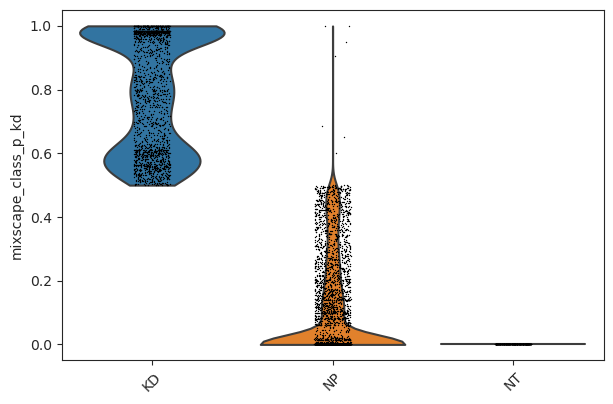

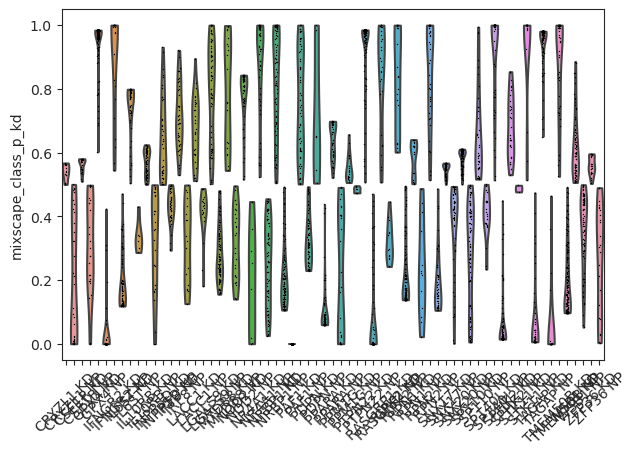

In [23]:
figs_mixscape = self.run_mixscape(col_split_by=col_split_by,
                                  target_gene_idents=True  
                                  # or specify list of genes of interest
                                  )

## Distance Metrics

See `self.figures[run_label]["distances"]` and  `self.results[run_label]["distances"]`
for results.


Un-used Keyword Arguments: {'col_gene_symbols': 'gene_symbols', 'col_sample_id': None, 'col_batch': None, 'col_perturbation': 'perturbation', 'col_guide_rna': 'feature_call', 'col_num_umis': 'num_umis', 'key_control': 'NT', 'key_treatment': 'KD', 'key_nonperturbed': 'NP'}


Output()

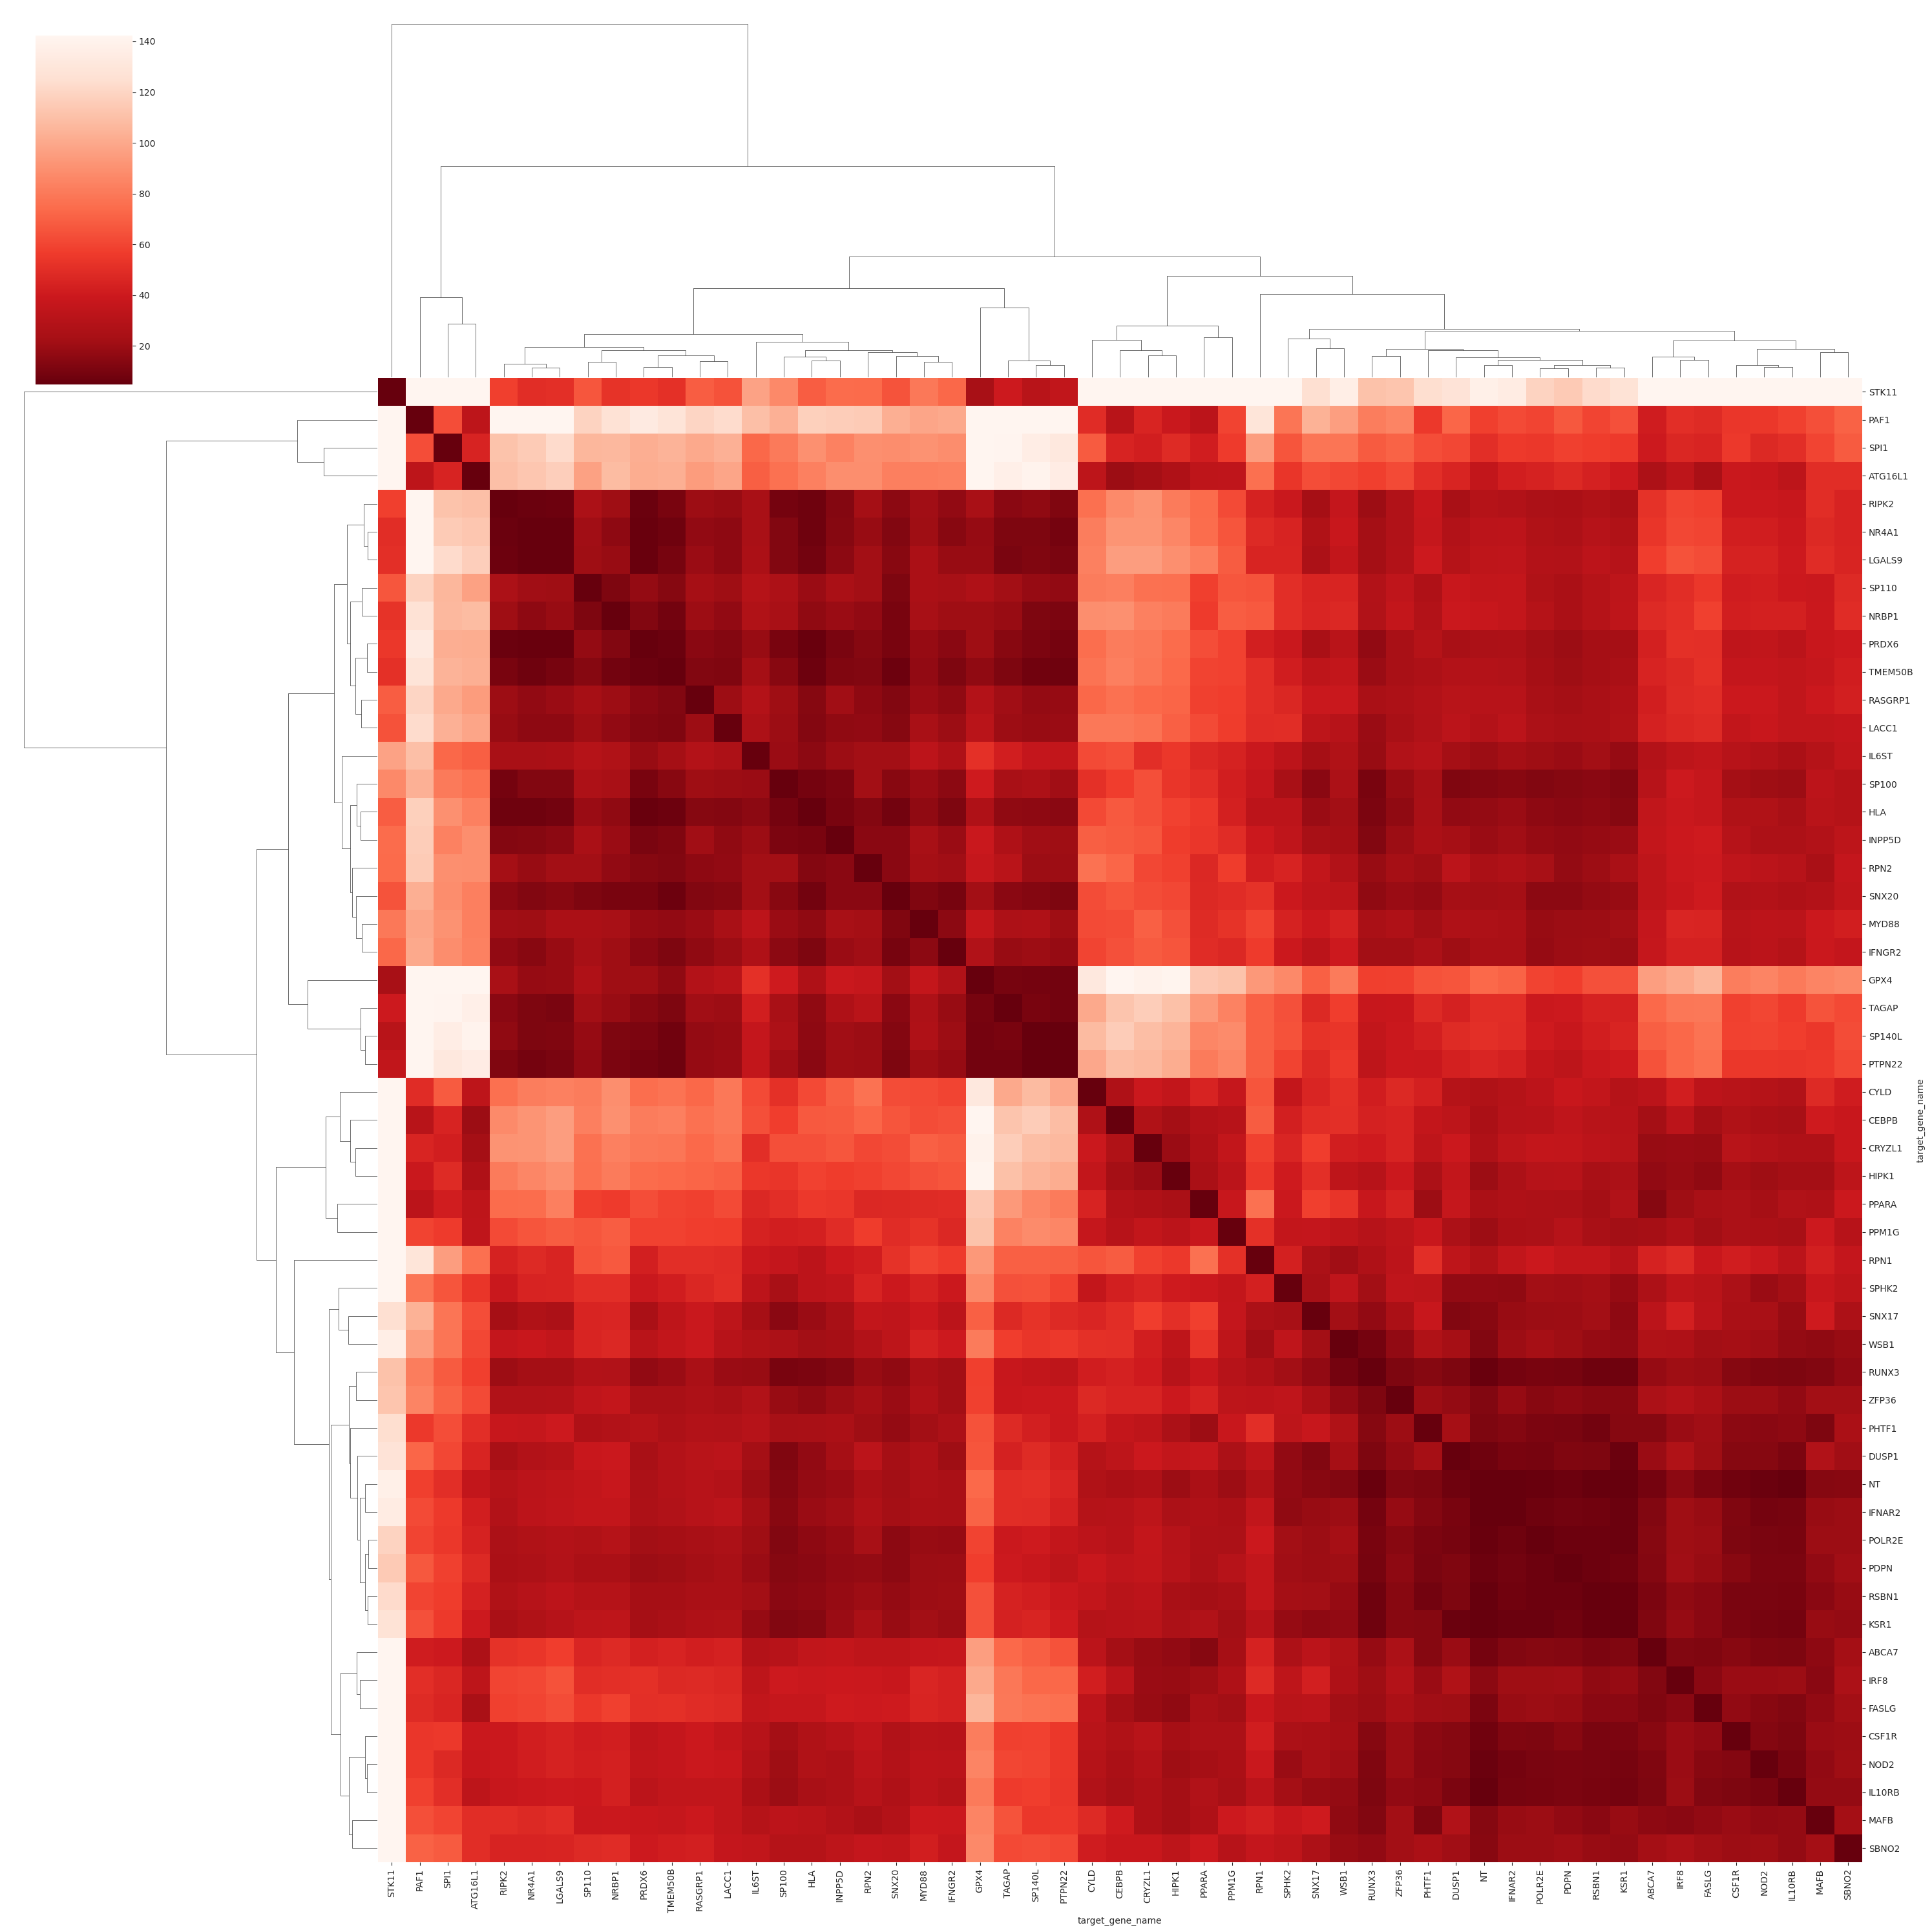

Output()

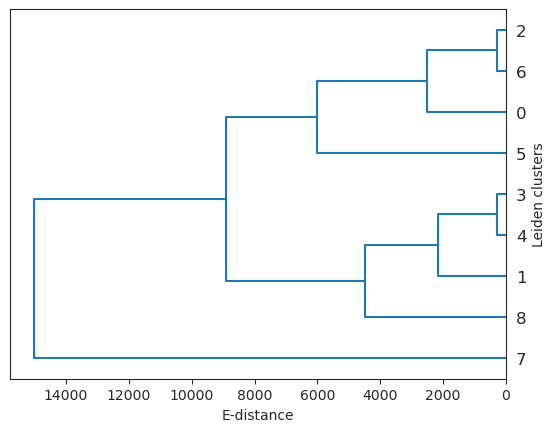

Output()


Un-used Keyword Arguments: {'col_gene_symbols': 'gene_symbols', 'col_sample_id': None, 'col_batch': None, 'col_perturbation': 'perturbation', 'col_guide_rna': 'feature_call', 'col_num_umis': 'num_umis', 'key_control': 'NT', 'key_treatment': 'KD', 'key_nonperturbed': 'NP'}


<Figure size 640x480 with 0 Axes>

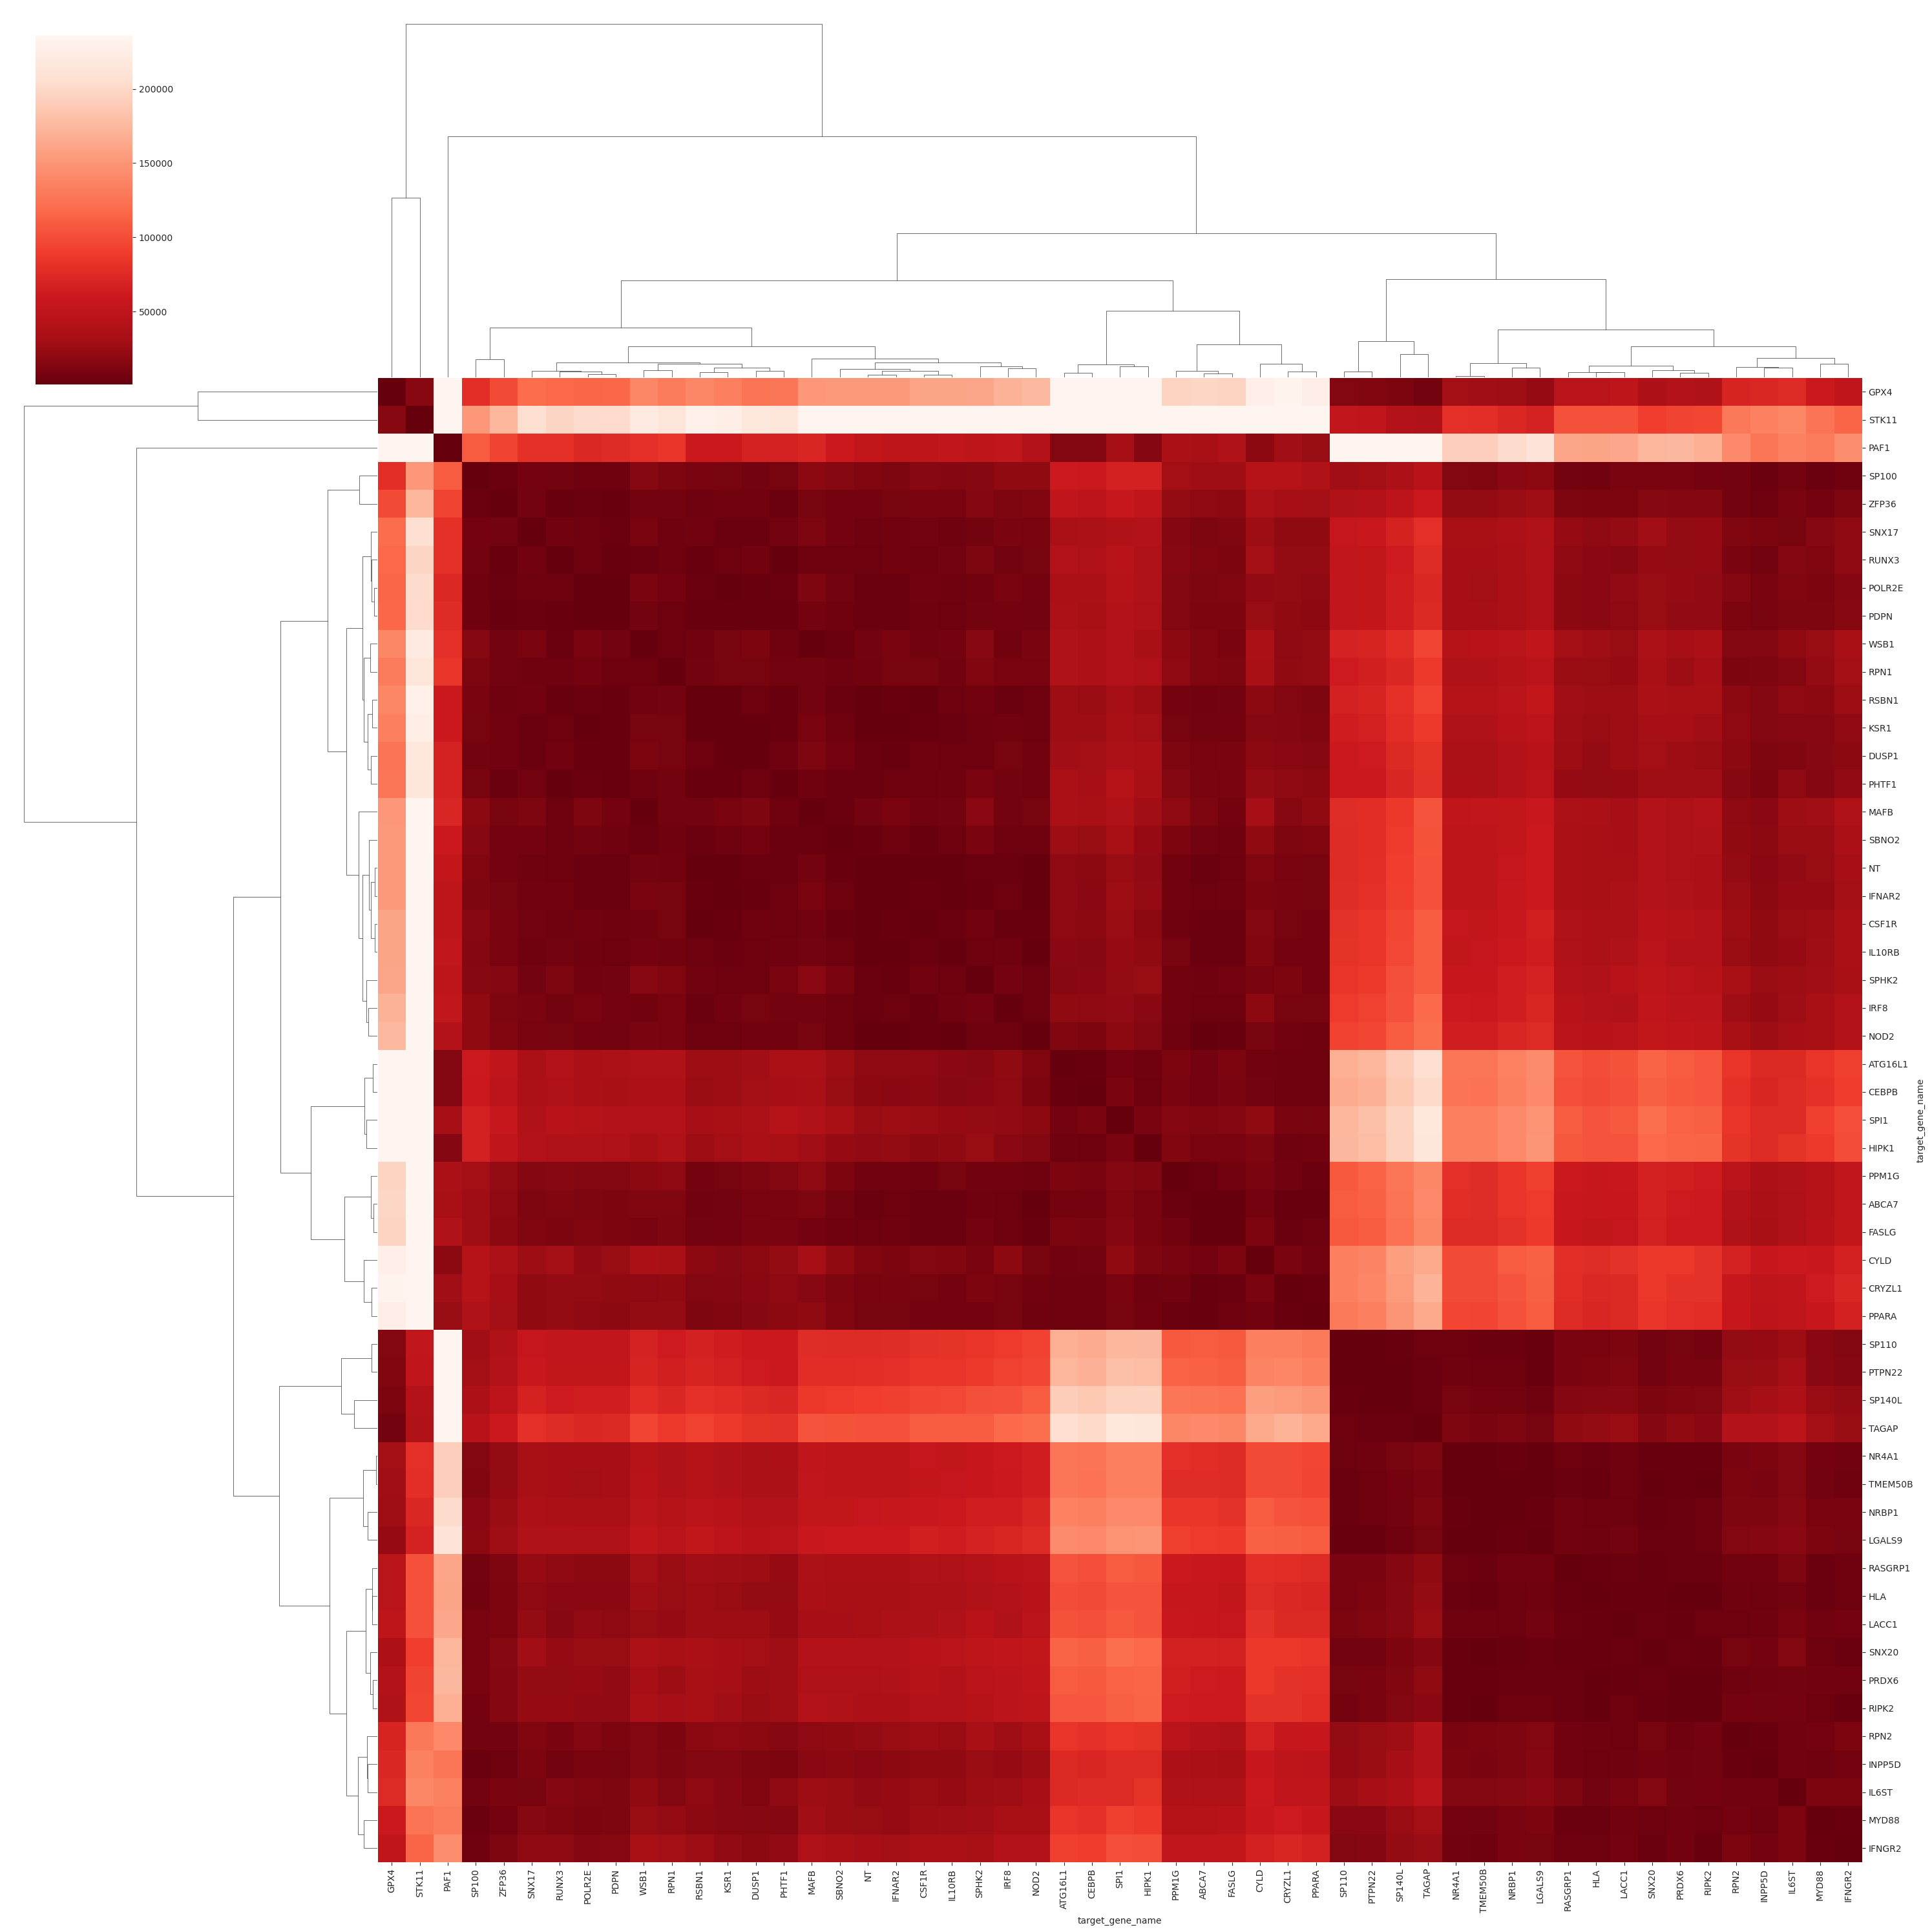

Output()

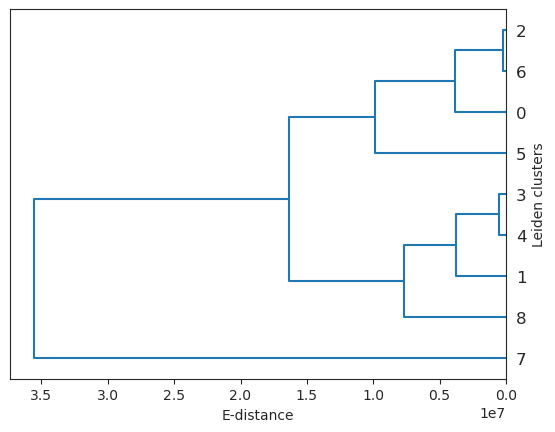

<Figure size 640x480 with 0 Axes>

In [9]:
fig_dist_w = self.compute_distance(distance_type="edistance", method="X_pca",
                                   kws_plot=dict(figsize=(30, 30), robust=True))

fig_dist_e = self.compute_distance(distance_type="mmd", method="X_pca",
                                   kws_plot=dict(figsize=(30, 30), robust=True))

## Composition Analysis

In [10]:
out_ca = cr.ax.analyze_composition(
    self.adata, "1", assay=self._assay, analysis_type="cell_level", 
    generate_sample_level=False, **self._columns, 
    sample_identifier=None, est_fdr=0.05)


Un-used Keyword Arguments: {'col_gene_symbols': 'gene_symbols', 'col_sample_id': None, 'col_batch': None, 'col_guide_rna': 'feature_call', 'col_num_umis': 'num_umis', 'col_target_genes': 'target_gene_name'}
MuData object with n_obs × n_vars = 6733 × 22024
  2 modalities
    rna:	6733 x 22024
      obs:	'num_features', 'feature_call_original', 'num_umis_original', 'feature_call', 'feature_call_flat_ix', 'feature_call_list_all', 'num_umis_list_all', 'num_umis_total', 'feature_call_list_filtered', 'num_umis_list_filtered', 'feature_call_filtered', 'num_umis_filtered', 'num_umis', 'target_gene_name', 'perturbation', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'leiden'
      var:	'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
      uns:	'pca', 'neighbors', 'umap

IndexError: Unknown indexer None of type <class 'NoneType'>

In [22]:
col_gene_symbols = 'gene_symbols'
col_cell_type = 'leiden'
col_sample_id = 'None'
col_batch = 'None'
col_perturbation = 'perturbation'
col_guide_rna = 'feature_call'
col_num_umis = 'num_umis'
col_target_genes = 'target_gene_name'
key_control = 'NT'
key_treatment = 'KD'
key_nonperturbed = 'NP'
    
    
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    self.adata, "cell_level",
    generate_sample_level=True,
    cell_type_identifier=col_cell_type, 
    sample_identifier=None, 
    covariate_obs=col_perturbation)  # load data

TypeError: 'NoneType' object is not iterable